In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
trainset_detail = pd.read_csv('C:/Users/yogy-/Downloads/MLT2D DTS2022 Demo Day/Handwritting Recognition/written_name_train_v2.csv', sep=',')
validset_detail = pd.read_csv('C:/Users/yogy-/Downloads/MLT2D DTS2022 Demo Day/Handwritting Recognition/written_name_validation_v2.csv', sep=',')    
testset_detail = pd.read_csv('C:/Users/yogy-/Downloads/MLT2D DTS2022 Demo Day/Handwritting Recognition/written_name_test_v2.csv', sep=',')                              

In [3]:
print("Dimensi Trainset " + str(trainset_detail.shape))
print("Dimensi Validationset " + str(validset_detail.shape))
print("Dimensi Testset " + str(testset_detail.shape))

Dimensi Trainset (330961, 2)
Dimensi Validationset (41370, 2)
Dimensi Testset (41370, 2)


In [4]:
print(trainset_detail.tail())
print(validset_detail.head())
print(testset_detail.head())

                FILENAME       IDENTITY
330956  TRAIN_330957.jpg          LENNY
330957  TRAIN_330958.jpg        TIFFANY
330958  TRAIN_330959.jpg  COUTINHO DESA
330959  TRAIN_330960.jpg         MOURAD
330960  TRAIN_330961.jpg        HELOISE
              FILENAME    IDENTITY
0  VALIDATION_0001.jpg       BILEL
1  VALIDATION_0002.jpg  LAUMIONIER
2  VALIDATION_0003.jpg         LEA
3  VALIDATION_0004.jpg   JEAN-ROCH
4  VALIDATION_0005.jpg        RUPP
        FILENAME  IDENTITY
0  TEST_0001.jpg     KEVIN
1  TEST_0002.jpg  CLOTAIRE
2  TEST_0003.jpg      LENA
3  TEST_0004.jpg     JULES
4  TEST_0005.jpg   CHERPIN


In [5]:
print(trainset_detail.info())
print(validset_detail.info())
print(testset_detail.info())

# Note : terlihat terdapat label yang NaN/Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41300 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None


In [6]:
# change nan with "unidentified"
trainset_detail['IDENTITY'] = trainset_detail['IDENTITY'].replace(np.nan, "unidentified")
validset_detail['IDENTITY'] = validset_detail['IDENTITY'].replace(np.nan, "unidentified")
testset_detail['IDENTITY'] = testset_detail['IDENTITY'].replace(np.nan, "unidentified")

In [7]:
# Text preprocessing function
str_punc = string.punctuation.replace(',', '').replace("'",'')

def clean(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.replace(" ", "")
    text = text.lower()
    return text 

In [8]:
# preprocessed text label
trainset_detail['IDENTITY'] = trainset_detail['IDENTITY'].apply(clean)
validset_detail['IDENTITY'] = validset_detail['IDENTITY'].apply(clean)
testset_detail['IDENTITY'] = testset_detail['IDENTITY'].apply(clean)

In [9]:
print(trainset_detail.info())
print(validset_detail.info())
print(testset_detail.info())

# Note : sudah tidak terdapat kolom yang mengandung NaN/Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330961 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41370 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41370 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None


In [10]:
basepath = 'C:/Users/yogy-/Downloads/'
traindir = os.path.dirname('MLT2D DTS2022 Demo Day/Handwritting Recognition/train_v2/')
validdir = os.path.dirname('MLT2D DTS2022 Demo Day/Handwritting Recognition/validation_v2/')
testdir = os.path.dirname('MLT2D DTS2022 Demo Day/Handwritting Recognition/test_v2/')

In [46]:
trainset_path = []
trainset_label = []
for i in range(len(trainset_detail)) :
    img_file = basepath+traindir+r'/'+trainset_detail['FILENAME'][i]
    if os.path.getsize(img_file):
        trainset_path.append(img_file)
        if len(trainset_detail['IDENTITY'][i]) > 0 :
            trainset_label.append(trainset_detail['IDENTITY'][i])
        else :
            trainset_label.append("unidentified")
        
validset_path = []
validset_label = []
for i in range(len(validset_detail)) :
    img_file = basepath+validdir+r'/'+validset_detail['FILENAME'][i]
    if os.path.getsize(img_file):
        validset_path.append(img_file)
        if len(validset_detail['IDENTITY'][i]) > 0 :
            validset_label.append(validset_detail['IDENTITY'][i])
        else :
            validset_label.append("unidentified")
        
testset_path = []
testset_label = []
for i in range(len(testset_detail)) :
    img_file = basepath+testdir+r'/'+testset_detail['FILENAME'][i]
    if os.path.getsize(img_file):
        testset_path.append(img_file)
        if len(testset_detail['IDENTITY'][i]) > 0 :
            testset_label.append(testset_detail['IDENTITY'][i])
        else :
            testset_label.append("unidentified")

In [47]:
# Get max length label
max_length1 = max([len(label) for label in trainset_label])
max_length2 = max([len(label) for label in validset_label])
max_length3 = max([len(label) for label in testset_label])
makslen = max(max_length1,max_length2,max_length3)
makslen

31

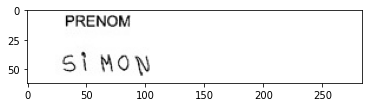

simon


In [48]:
img = load_img(trainset_path[1])
x = img_to_array(img)
x = x / 255
plt.gray()
plt.imshow(x)
plt.show()
print(trainset_label[1])

In [49]:
set_characters = set(char for label in trainset_label for char in label)

# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=list(set_characters), mask_token=None)

# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [50]:
def encode_label(image,label):
    # for image
    img = tf.io.read_file(image)
    img = tf.io.decode_jpeg(img,channels=1) # perhatikan ini
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32) # perhatikan ini
    img = tf.image.resize(img, [50, 200], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR) # perhatikan ini
    img = tf.transpose(img, perm=[1, 0, 2])
    # for label
    label = char_to_num(tf.strings.unicode_split(label, 'UTF-8'))
    length = tf.shape(label)[0]
    pad_amount = makslen - length
    label = tf.pad(label, paddings = [[0, pad_amount]], constant_values = 99)
    return {'image':img,'label':label}

In [51]:
# mapping dataset in order to use encoded label
trainset = tf.data.Dataset.from_tensor_slices((trainset_path,trainset_label))
trainset = (
             trainset.map(encode_label, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)
            )

validateset = tf.data.Dataset.from_tensor_slices((validset_path,validset_label))
validateset = (
               validateset.map(encode_label, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)
              )

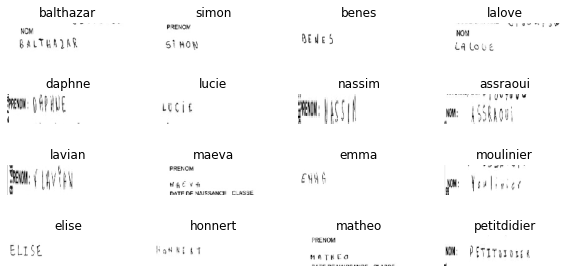

In [82]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in trainset.take(1):
    images = batch["image"]
    labels = batch["label"]
    
    for i in range(16):
        img = images[i]
        #img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1,0,2])
        img = (img * 255.0).numpy().clip(0,255).astype("uint8")
        img = img[:,:,0]
        
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label,99)))
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")
        
        ax[i//4,i%4].imshow(img,cmap="gray")
        ax[i//4,i%4].set_title(label)
        ax[i//4,i%4].axis("off")
        
plt.show()

In [52]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [53]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(200, 50, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")
    
    # First conv block
    x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
    x = layers.MaxPooling2D(pool_size=(2, 2),strides=2)(x)
    # Second conv block
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2),strides=2)(x)
    
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 32. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((200 // 4), (50 // 4) * 32)
    x = layers.Reshape(target_shape=new_shape)(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    
    # RNNs
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(32, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(len(char_to_num.get_vocabulary()) + 1, activation="softmax")(x)
    
    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
                inputs=[input_img, labels], outputs=output
            )
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    # Compile the model and return
    model.compile(optimizer=opt)
    return model

In [54]:
# Get the model
model = build_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 200, 50, 16)  160         ['image[0][0]']                  
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 100, 25, 16)  0          ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 100, 25, 32)  4640        ['max_pooling2d_6[0][0]']  

In [55]:
epochs = 30
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
process_train = model.fit(
    trainset,
    validation_data=validateset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/30
5172/5172 [==============================] - 1933s 373ms/step - loss: 20.9203 - val_loss: 19.1213
Epoch 2/30
5172/5172 [==============================] - 1762s 341ms/step - loss: 18.6851 - val_loss: 18.3957
Epoch 3/30
5172/5172 [==============================] - 1700s 329ms/step - loss: 18.1789 - val_loss: 17.8235
Epoch 4/30
5172/5172 [==============================] - 1688s 326ms/step - loss: 17.3796 - val_loss: 16.8562
Epoch 5/30
5172/5172 [==============================] - 1739s 336ms/step - loss: 16.4962 - val_loss: 15.8229
Epoch 6/30
5172/5172 [==============================] - 1754s 339ms/step - loss: 15.6560 - val_loss: 15.0346
Epoch 7/30
5172/5172 [==============================] - 1754s 339ms/step - loss: 15.0239 - val_loss: 14.4073
Epoch 8/30
5172/5172 [==============================] - 1750s 338ms/step - loss: 14.4312 - val_loss: 13.6812
Epoch 9/30
5172/5172 [==============================] - 1769s 342ms/step - loss: 13.7382 - val_loss: 12.8397
Epoch 10/30
5172/51

In [75]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense_5").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :makslen
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text




Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 200, 50, 16)       160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 25, 16)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 25, 32)       4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 12, 32)       0         
 2D)                                                             
                                                                 
 reshape_3 (Reshape)         (None, 50, 384)           0   

In [95]:
testset = tf.data.Dataset.from_tensor_slices((testset_path,testset_label))
testset = (
               testset.map(encode_label, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)
              )

2/2 [==============================] - 0s 107ms/step
0
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
1
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
2
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
3
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
4
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255

IndexError: index 4 is out of bounds for axis 0 with size 4

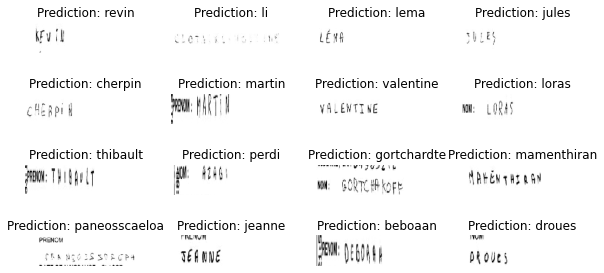

In [114]:
#  Let's check results on some validation samples
for batch in testset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(10, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        print(i)
        print(img)        
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

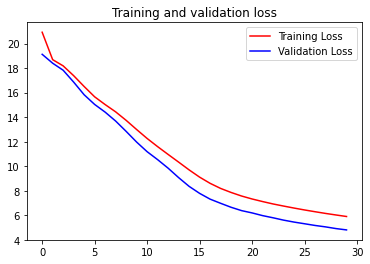

<Figure size 432x288 with 0 Axes>

In [88]:
# Visualize Loss & Accuracy

%matplotlib inline
loss = process_train.history['loss']
val_loss = process_train.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.show()

In [91]:
model.save('Handwritten Recognition.h5')

In [ ]:
https://github.com/naveen-marthala/Higly-Imabalanced-Image-Classification---in-tensorflow-keras/blob/master/imbalanced-classification-on-fruits.ipynb
https://machinelearningmastery.com/multi-class-imbalanced-classification/
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#build_the_model   
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
https://notebook.community/tensorflow/docs/site/en/tutorials/images/classification
https://forpythons.com/unable-to-allocate-array-with-shape-and-data-type/
https://towardsdatascience.com/cifar-100-pre-processing-for-image-recognition-task-68015b43d658
https://keras.io/examples/audio/ctc_asr/
https://www.tensorflow.org/api_docs/python/tf/strings/unicode_split
https://www.tensorflow.org/api_docs/python/tf/strings/reduce_join
https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup
https://towardsdatascience.com/intuitively-understanding-connectionist-temporal-classification-3797e43a86c
https://towardsdatascience.com/build-a-handwritten-text-recognition-system-using-tensorflow-2326a3487cd5
https://stackoverflow.com/questions/70091975/invalidargumenterror-cannot-add-tensor-to-the-batch-number-of-elements-does-no
https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/02_Dataset_solution.ipynb#scrollTo=MPkvHdAYNt9J
https://keras.io/examples/vision/captcha_ocr/
https://sid2697.github.io/Blog_Sid/algorithm/2019/10/19/CTC-Loss.html
https://www.tensorflow.org/api_docs/python/tf/data/Dataset
https://towardsdatascience.com/a-gentle-introduction-to-ocr-ee1469a201aa